# Lecture 2: LSI Systems and Convolution in 1D

In [135]:
## MP 573 Lecture 2: LSI Systems and Convolution in 1D
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

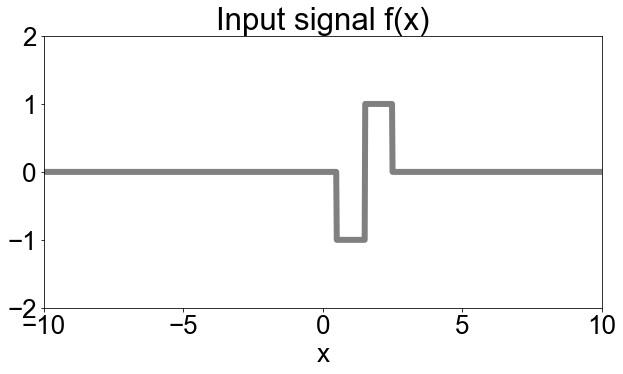

In [152]:
# Simulate 1D input signal f(x)
N = 1001
xmax = 10
x = np.linspace(-xmax,xmax,N)
f = 1.0*(np.abs(x-2)<0.5) - 1.0*(np.abs(x-1)<=0.5)

plt.figure(figsize=(10,5))
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 26}

# Plot the input signal f(x)
plt.rc('font', **font)
plt.plot(x,f,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('Input signal f(x)');


In [153]:
def ExampleSystem(f,x):
    g = f    # Example A from the lecture notes section 2.4
    g = np.maximum(f,0) # Example B
    g = np.abs(f) # Example C
    g = f + 1 # Example D
    g = f[x==0] + 0*f # Example E
    h =  1.0*(np.abs(x)<=0.5) # Example F
    g = (x[1]-x[0])*signal.convolve(h, f, mode='same') # Example F (cont)
    # We will revisit example G (Fourier transform) in future lectures and exercises
    return (g)

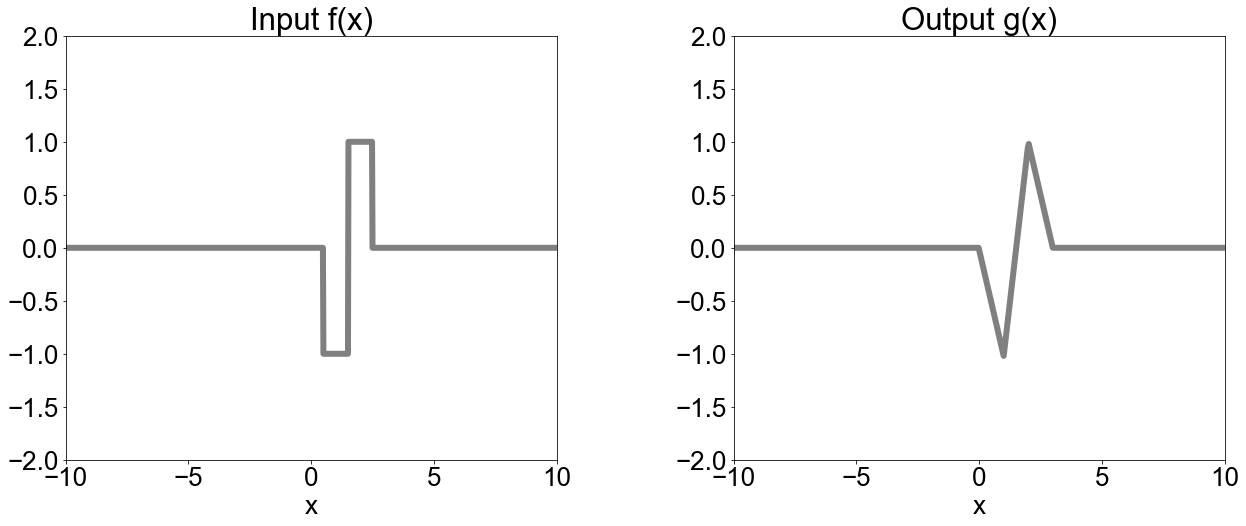

In [154]:
# Now let's run our signal through our system 
g = ExampleSystem(f,x)

# Plot the input and output signals
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,f,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.xlabel('x')
plt.title('Input f(x)')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,g,'gray',linewidth=6.0)
plt.axis([x[0],x[N-1],-2,2])
plt.title('Output g(x)')
plt.xlabel('x')
plt.tight_layout(pad=4.0)

